In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

df = pd.read_csv('housing.csv')
train = df.iloc[:389,]
test = df.iloc[389:,]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [3]:
df.shape

(489, 4)

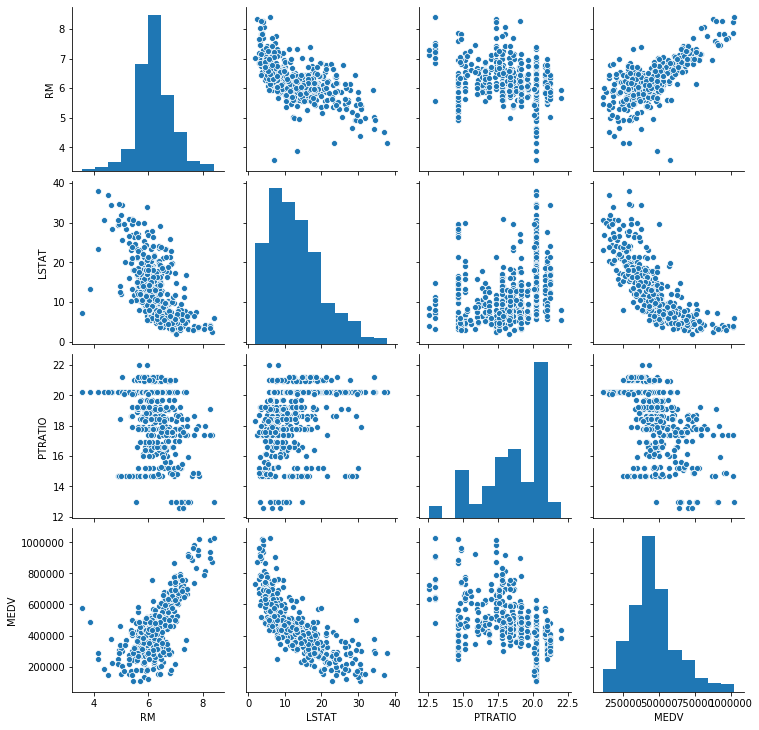

In [4]:
sb.pairplot(df);

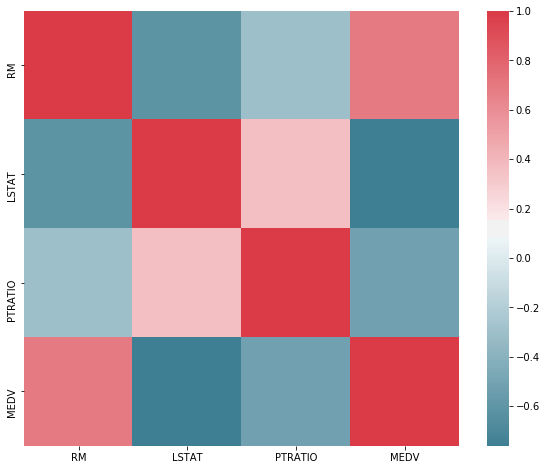

In [5]:
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [3]:
y_train = train.copy()
y_train = y_train.MEDV.to_numpy()
y_train = y_train.reshape((train.shape[0],1))
        # *******
x_train = train.copy()
x_train.drop(columns = ['MEDV','PTRATIO'],inplace=True)
# x_train.drop(columns = ['MEDV'],inplace=True)
# x_train['LSTAT_2'] = x_train['LSTAT'].apply(lambda x: x**2)
x_train.insert(0,'ones',1)
x_train = x_train.to_numpy()
# ---------------------
y_test = test.MEDV.to_numpy()
y_test = y_test.reshape((test.shape[0],1))
        # *******
x_test = test.copy()
x_test.drop(columns = ['MEDV','PTRATIO'],inplace=True)
# x_test.drop(columns = ['MEDV'],inplace=True)
# x_test['LSTAT_2'] = x_test['LSTAT'].apply(lambda x: x**2)
x_test.insert(0,'ones',1)
x_test = x_test.to_numpy()
# ---------------------

In [4]:
x_train

array([[ 1.   ,  6.575,  4.98 ],
       [ 1.   ,  6.421,  9.14 ],
       [ 1.   ,  7.185,  4.03 ],
       ...,
       [ 1.   ,  5.349, 19.77 ],
       [ 1.   ,  5.531, 27.38 ],
       [ 1.   ,  5.683, 22.98 ]])

In [5]:
def hypothesis(wight,feature) :
    return np.dot(feature,wight.T)

m*3 X 3*1 = m*1

In [6]:
def cost(wight,feature,y,m) :
    pre = hypothesis(wight,feature)
    cost = (1/(2*m)) * np.sum((pre-y)**2)
    return cost

In [7]:
def gradient_descent(wight,feature,y,iteratoins,step_size,m,l2):
    Hcost = []
    for i in range(iteratoins) :
#         print(wight)
        ridg_term = 2*l2*wight
        prediction = hypothesis(wight,feature)
        error = prediction - y
        wight = wight - (step_size  * (np.dot((error).T,feature)) )/m
        '''+ ridg_term''' 
        Hcost.append(cost(wight,feature,y,m))
    return wight,Hcost

In [8]:
init_wight = np.zeros((1,x_train.shape[1]))
m = x_train.shape[0]
feature = x_train
y = y_train
step_size = 0.0001
iterations = 10000
# ---------------------
wight , Hcost = gradient_descent(init_wight,feature,y,iterations,step_size,m,0.01)

In [9]:
print(wight)

[[-1.46415584e+95 -8.90421266e+95 -2.18212586e+96]]


In [10]:
        #normal equation
theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

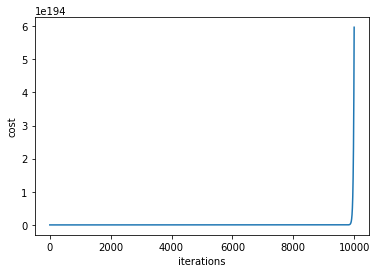

In [11]:
plt.plot(Hcost)
plt.xlabel('iterations')
plt.ylabel('cost');

In [35]:
print("normal_equation = ",cost(theta.T,x_test,y_test,m))
print("gradient_decsent = ",cost(wight,x_test,y_test,m))

normal_equation =  1895811235.3636065
gradient_decsent =  1612961980.9707108


In [36]:
print(theta.T)

[[-190470.49261403  125855.3581843    -9867.3805339 ]]


In [37]:
print(wight)

[[ 12477.11074543  97506.84865016 -11917.02220318]]
